In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd
train_df = pd.read_csv(r'C:\Users\aayus\OneDrive\Desktop\ecgclasscification\data\mitbih_train.csv')
test_df=pd.read_csv(r'C:\Users\aayus\OneDrive\Desktop\ecgclasscification\data\mitbih_test.csv',)
normal_df=pd.read_csv(r'C:\Users\aayus\OneDrive\Desktop\ecgclasscification\data\ptbdb_normal.csv',)


In [ ]:
train_df.columns = range(train_df.shape[1])
test_df.columns = range(test_df.shape[1])

train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)
print(len(normal_df.columns))  

187
0    72470
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64
188


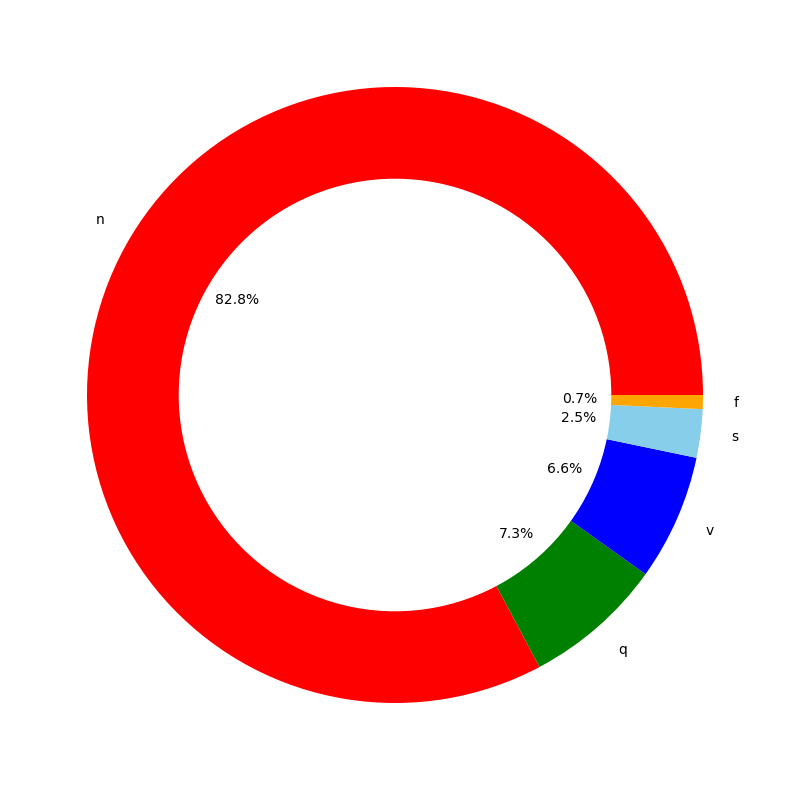

In [36]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [40]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [41]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


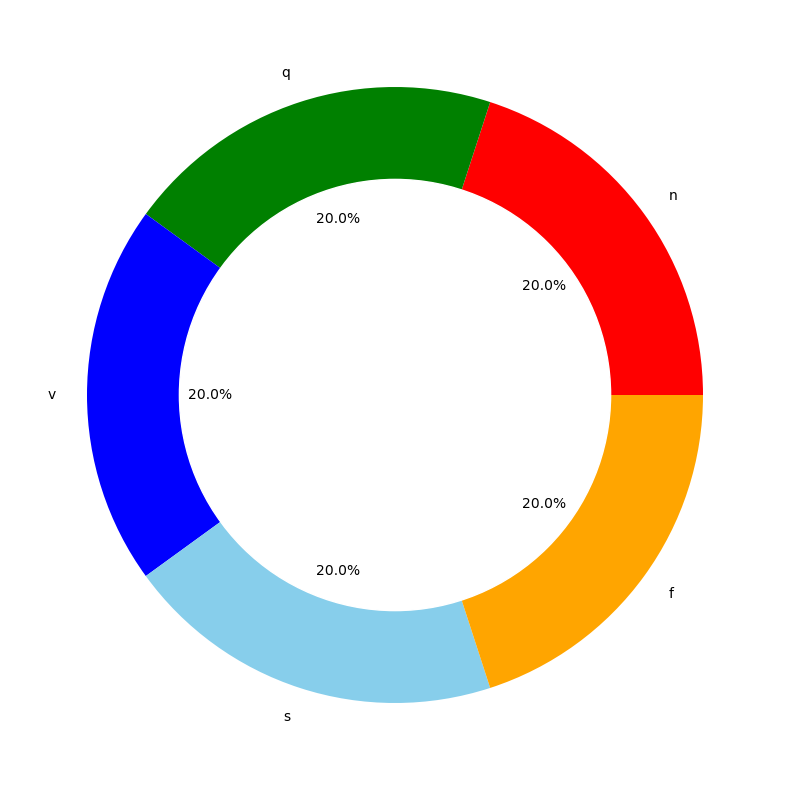

In [42]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [12]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
39870,0.927273,0.706818,0.245455,0.159091,0.143182,0.156818,0.140909,0.136364,0.120455,0.138636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73654,0.895833,0.953704,0.386574,0.000000,0.240741,0.275463,0.314815,0.321759,0.321759,0.344907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76287,0.000000,0.098684,0.175987,0.222039,0.325658,0.404605,0.411184,0.427632,0.434211,0.427632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80991,0.869963,0.945055,1.000000,0.714286,0.351648,0.188645,0.130037,0.098901,0.100733,0.078755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86305,0.753165,0.664557,0.575949,0.462025,0.333861,0.175633,0.082278,0.007911,0.006329,0.023734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


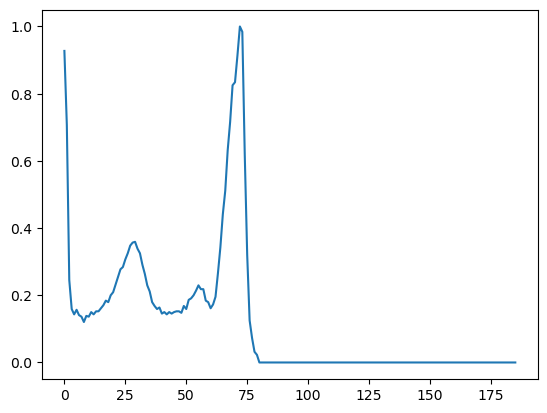

In [ ]:
plt.plot(c.iloc[0,:186])

In [ ]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


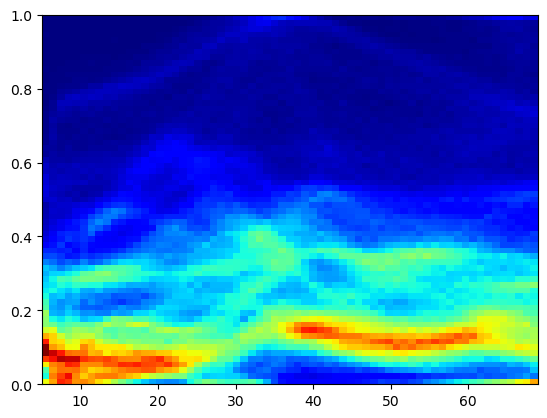

In [15]:
plot_hist(0,70,5,65)

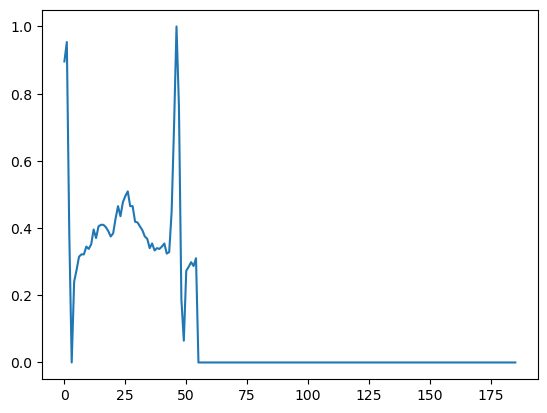

In [16]:
plt.plot(c.iloc[1,:186])

900000
900000


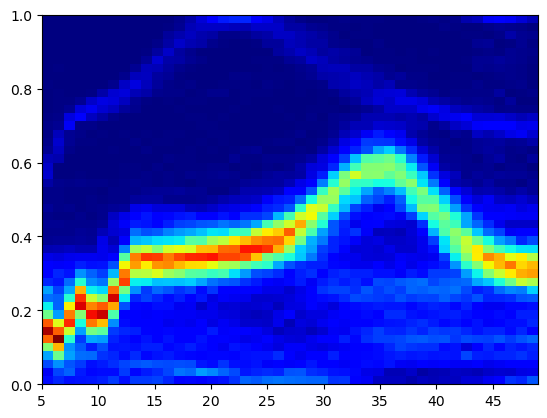

In [17]:
plot_hist(1,50,5,45)

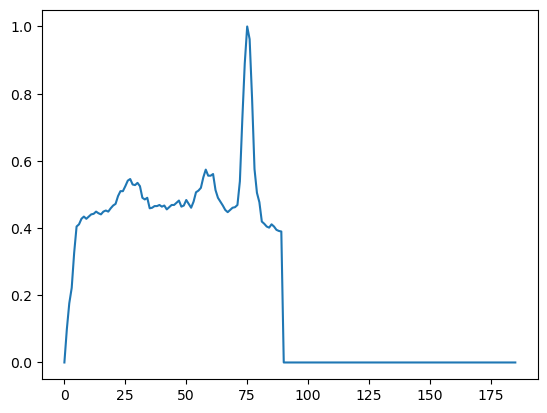

In [ ]:
plt.plot(c.iloc[2,:186])

900000
900000


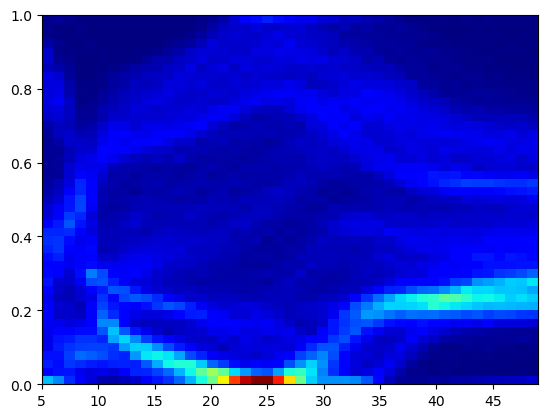

In [19]:
plot_hist(2,50,5,45)

Here is an exemple of the two classes :


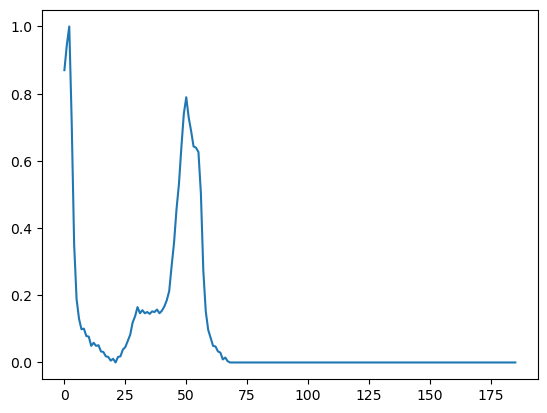

In [20]:
plt.plot(c.iloc[3,:186])

900000
900000


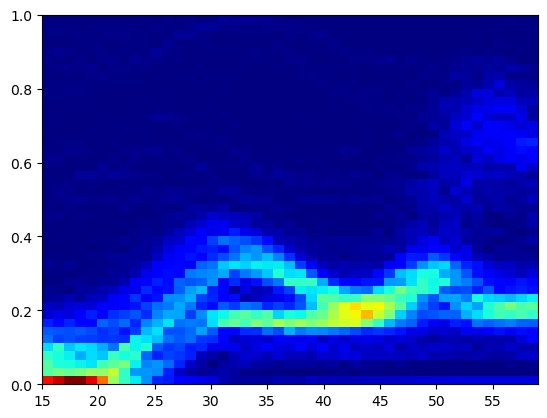

In [21]:
plot_hist(3,60,15,45)

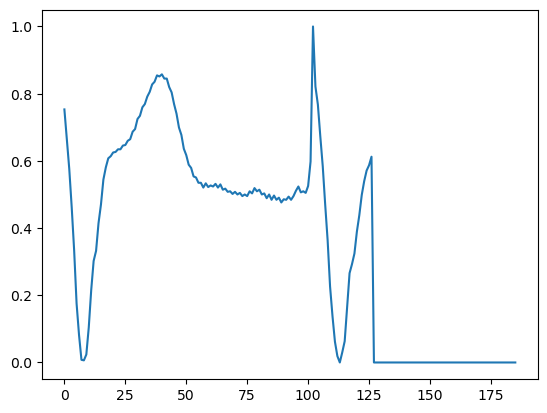

In [22]:
plt.plot(c.iloc[4,:186])

700000
700000


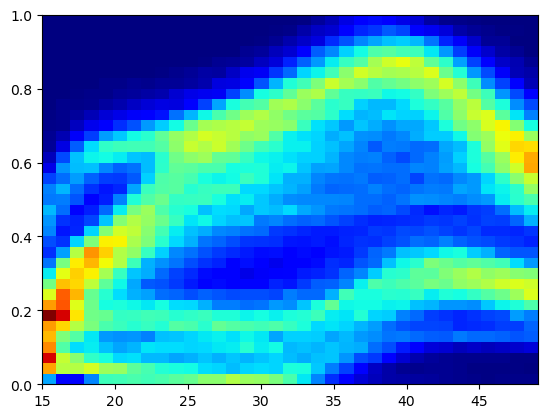

In [23]:
plot_hist(4,50,15,35)

In [24]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

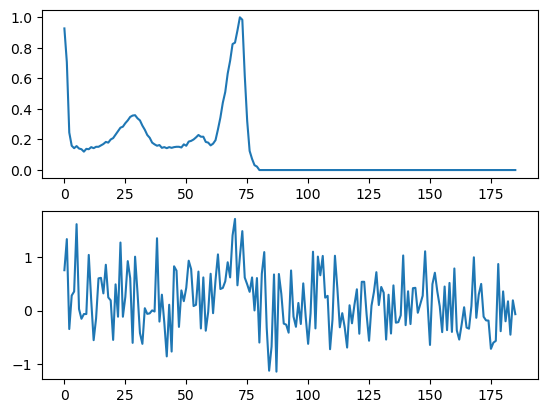

In [25]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train = train_df[187]
target_test = test_df[187]

y_train = to_categorical(target_train)
y_test = to_categorical(target_test)


100000

In [27]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
def network(X_train,y_train,X_test,y_test):
    
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='ecg_classification.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [29]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the network function
def network(X_train, y_train, X_test, y_test):
    # Input layer
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # First Convolutional layer with MaxPooling
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)

    # Second Convolutional layer with MaxPooling
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the network function
def network(X_train, y_train, X_test, y_test):

    # Flatten the output for Dense layer input
    x = Flatten()(x)

    # Dense layers with Dropout
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output layer (adjust number of neurons based on your classes)
    output_layer = Dense(y_train.shape[1], activation='softmax')(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint('ecg_classification.keras', save_best_only=True, monitor='val_loss')  # Updated extension to .keras

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping, checkpoint])
    
    return model, history

# Assuming X_train, y_train, X_test, and y_test are already defined
model, history = network(X_train, y_train, X_test, y_test)


Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.4818 - loss: 1.3144 - val_accuracy: 0.6162 - val_loss: 1.0690
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6232 - loss: 0.9954 - val_accuracy: 0.6341 - val_loss: 1.0509
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6458 - loss: 0.9447 - val_accuracy: 0.5888 - val_loss: 1.0948
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6604 - loss: 0.9133 - val_accuracy: 0.5953 - val_loss: 1.1019
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6693 - loss: 0.8870 - val_accuracy: 0.6291 - val_loss: 1.0506
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6756 - loss: 0.8719 - val_accuracy: 0.5972 - val_loss: 1.0045
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6819 - loss: 0.8583 - val_accuracy: 0.5556 - val_loss: 1.0159
Epoch 8/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6871 - loss: 0

Accuracy: 62.21%


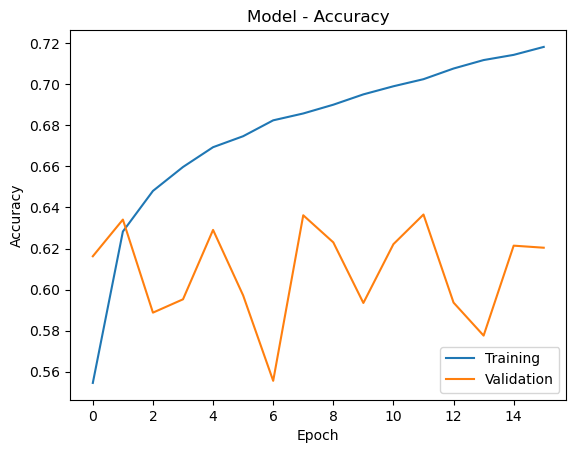

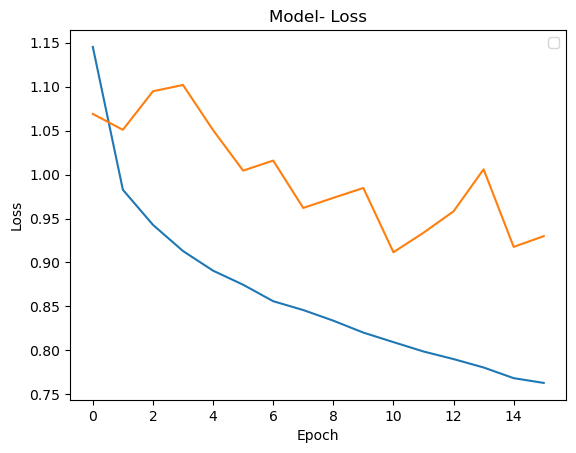

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [31]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


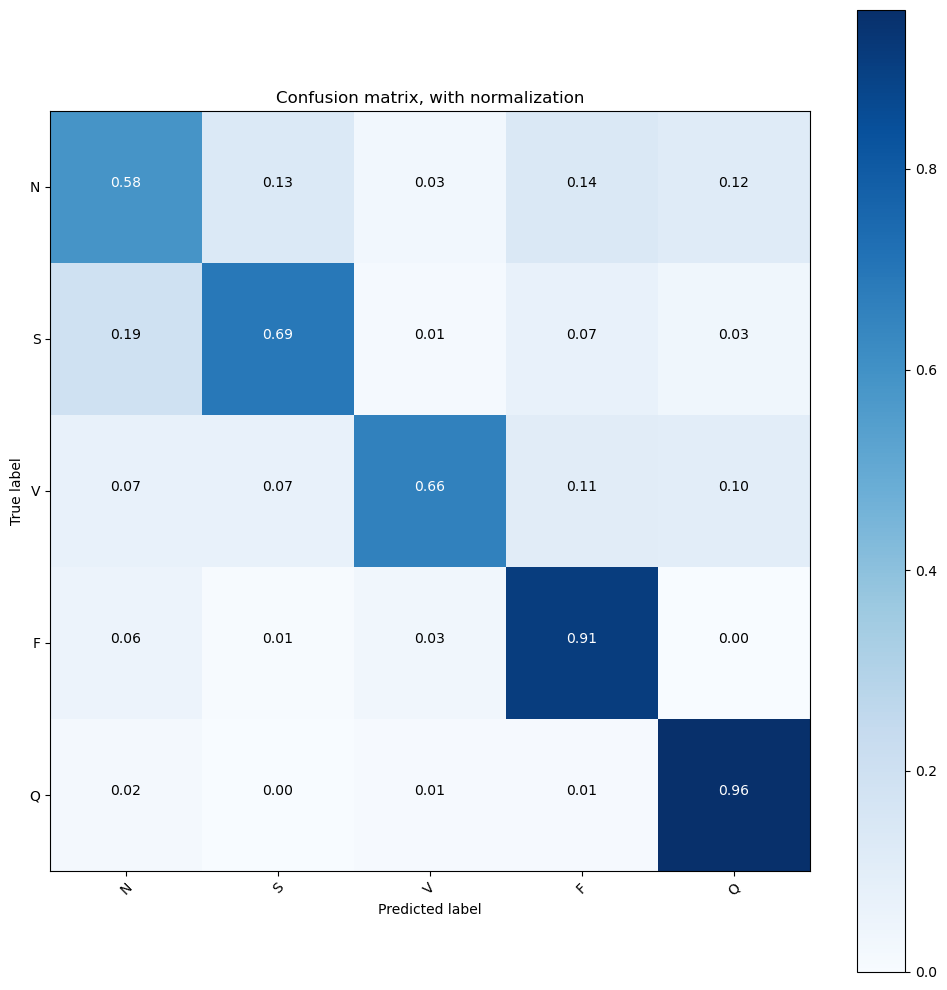

In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [ ]:
It looks like you have provided a detailed summary of various dataframes, series, and other objects related to a machine learning project. Here's a brief overview of what each object represents:

1. **df_2**: A pandas DataFrame with 20000 rows and 188 columns, containing float64 and int32 data types. It seems to be a dataset used for training or testing a model.

2. **df_2_upsample**: Another pandas DataFrame with the same dimensions and data types as `df_2`. This might be an upsampled version of `df_2` to handle class imbalance.

3. **df_3**: A pandas DataFrame with 20000 rows and 188 columns, similar to `df_2` and `df_2_upsample`.

4. **df_3_upsample**: An upsampled version of `df_3`.

5. **df_4**: A pandas DataFrame with 20000 rows and 188 columns.

6. **df_4_upsample**: An upsampled version of `df_4`.

7. **equilibre**: A pandas Series showing the count of different classes in the dataset. It indicates class imbalance with class '0' being the majority class.

8. **history**: A Keras History object that stores the training history of a neural network model.

9. **i**: An integer value, possibly used as an index or counter.

10. **model**: A Keras Functional model, which is a type of neural network model.

11. **my_circle**: A matplotlib Circle object, likely used for plotting.

12. **normal_df**: A pandas DataFrame with 4045 rows and 188 columns, containing float64 data types. This might be a normalized version of a dataset.

13. **p**: A matplotlib Figure object, used for plotting.

14. **target_test**: A pandas Series containing the target labels for the test dataset.

15. **target_train**: A pandas Series containing the target labels for the training dataset.

16. **tempo**: A pandas Series with 186 float64 values, possibly representing some temporal data.

17. **test_df**: A pandas DataFrame with 21891 rows and 188 columns, containing float64 data types. This is likely the test dataset.

18. **train_df**: A pandas DataFrame with 87553 rows and 188 columns, containing float64 and int32 data types. This is likely the training dataset.

19. **y_pred**: A numpy ndarray containing the predicted probabilities for each class from the model.

20. **y_test**: A numpy ndarray containing the one-hot encoded target labels for the test dataset.

21. **y_train**: A numpy ndarray containing the one-hot encoded target labels for the training dataset.

If you have any specific questions or need further assistance with any of these objects, please let me know!